# LEAD SCORING CASE STUDY 

### Problem Statement:
X Education is an online education company that sells courses to industry professionals. The company generates a large number of leads from various sources such as website visitors, form fill-ups, and referrals, but its lead conversion rate is only 30%. To improve this conversion rate, X Education wants to identify the most potential leads, also known as "Hot Leads." The company requires a lead scoring model that assigns a lead score to each lead based on the likelihood of conversion. The CEO has set a target lead conversion rate of 80%. The lead scoring model should help the sales team to prioritize potential leads that have a higher conversion chance and enable them to focus on communicating with them. By nurturing these potential leads, X Education can increase their chances of converting them into paying customers and achieve their target conversion rate.
### Goals of the Case Study:
- Build logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Step 1: Importing Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# import statmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Step 2: Importing and examining dataset

In [2]:
#Importing dataset.

leads_dataset=pd.read_csv("Leads.csv")

In [3]:
leads_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_dataset.shape

(9240, 37)

In [5]:
leads_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Check for duplicate variables...

print(sum(leads_dataset.duplicated(subset = 'Prospect ID')) == 0)
print(sum(leads_dataset.duplicated(subset = 'Lead Number')) == 0)

True
True


### Outcome:
No duplicates exist in 'Prospect ID' and 'Lead Number'.

### Step 3: Data cleaning
#### 3.1 Replace Select values with np.nan


In [8]:
#Inspects all the columns with Select variable in the dataframe.
colsHavingSelect = leads_dataset.isin(["Select"]).any()
print(colsHavingSelect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [9]:
#replace() will replace all the occurances of the given string to missing values.
leads_dataset.replace('Select', np.nan, inplace=True)

#### 3.2 Calculating the missing value percentage in each column

In [10]:
#Percentage of missing values in each column.
nullseries =  round(leads_dataset.isnull().sum()/len(leads_dataset)*100, 2).sort_values(ascending=False)
print(nullseries)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Inference:

There are high percentages of missing values in many columns and we should handle / remove them.
Dropping below As having more than 40% null values:
- How did you hear about X Education
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

In [11]:
#Dropping all columns having a missing value percentage greater than 40%.
leads_dataset = leads_dataset.drop(leads_dataset.loc[:, list((round(leads_dataset.isnull().sum()/len(leads_dataset)*100, 2)>=40))].columns, 1)

In [12]:
#Percentage of missing values in each column.
nullseries =  round(leads_dataset.isnull().sum()/len(leads_dataset)*100, 2).sort_values(ascending=False)
print(nullseries)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
leads_dataset.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 3.3 Checking null values of columns having categorical values

In [14]:
columnsList= ['City', 'Specialization', 'Tags', 'What matters most to you in choosing a course',
              'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

for i in columnsList:
        perc = round(leads_dataset[i].value_counts(normalize=True)*100, 2)
        print("value_counts % for :", i.upper(), ":\n")
        print(perc, "\n")
        print("==="*40, "\n")

value_counts % for : CITY :

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64 


value_counts % for : SPECIALIZATION :

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness             

#### Inference:
- **City:** 39.71% missing values. Adding/filling missing values with Mumbai(57.84%) will later cause bias in the model. Hence City column can be dropped.
- **Specialization:** 36.58% missing values. The specialization selected is evenly distributed. Hence dropping is not a good option. Creating additional category called 'Others' is better handling.
- **Tags:** 36.29% missing values. Tags are assigned to customers indicating the current status of the lead. This column will not be useful for modeling. Hence it can be dropped.
- **What matters most to you in choosing a course:** 29.32% missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. Hence, we can drop this column.
- **What is your current occupation:** 29.11% missing values. We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.
- **Country:** X Education sells online courses and appx 96% of the customers are from India. This is massively skewed and will not provide any insight. Hence, we can drop this column.
- **Last Activity:** "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.
- **Lead Source:** "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

In [15]:
# Dropping Columns 'City','Tags','Country' and'What matters most to you in choosing a course'

leads_dataset.drop(['City', 'Tags', 'Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)
leads_dataset.shape

(9240, 26)

In [16]:
# Adding / filling values as per the above observations

missing_values = {'Specialization':'Others', 'What is your current occupation':'Unemployed',
                'Last Activity':'Email Opened', 'Lead Source':'Google'}
leads_dataset = leads_dataset.fillna(value = missing_values)

In [17]:
#Percentage of missing values in each column.
nullseries =  round(leads_dataset.isnull().sum()/len(leads_dataset)*100, 2).sort_values(ascending = False)
print(nullseries)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### 3.4 Checking null values of columns having numerical values

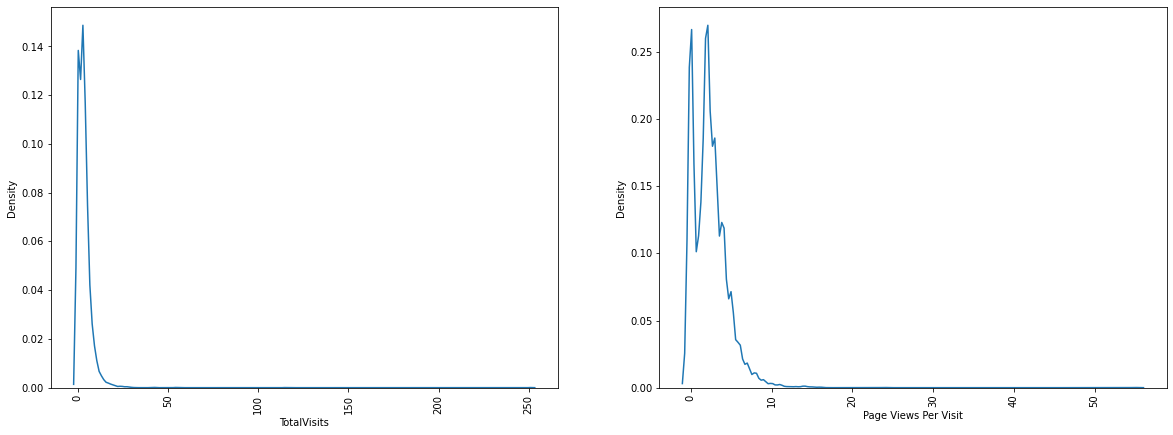

In [18]:
# Only 'TotalVisits' and'Page Views Per Visit' columns have null values

columnsList = ['TotalVisits', 'Page Views Per Visit']
       
plt.figure(figsize = (20,7))
for i in enumerate(columnsList):
    plt.subplot(1,2, i[0]+1)
    ax = sns.distplot(leads_dataset[i[1]], hist =False)
    plt.xticks(rotation=90)
    
plt.show()

#### Inference:
Missing values in 'TotalVisits' and 'Page Views Per Visit' can be imputed with mode.

In [19]:
# 'TotalVisits' missing values to be imputed with mode
leads_dataset['TotalVisits'].fillna(leads_dataset['TotalVisits'].mode()[0], inplace=True)

# 'Page Views Per Visit' missing values to be imputed with mode
leads_dataset['Page Views Per Visit'].fillna(leads_dataset['Page Views Per Visit'].mode()[0], inplace=True)

In [20]:
#Percentage of missing values in each column.
nullseries =  round(leads_dataset.isnull().sum()/len(leads_dataset)*100, 2).sort_values(ascending=False)
print(nullseries)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### 3.5 Dropping columns which are not useful for modeling

In [21]:
#check for columns with one unique value, count and freq is same

leads_dataset.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


#### Inference:
The following columns have only one unique value which are not useful hence these columns can be dropped:

- 'Magazine'
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content',
- 'Get updates on DM Content'
- 'I agree to pay the amount through cheque'

In [22]:
# Dropping Columns 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
#                  'Get updates on DM Content', 'I agree to pay the amount through cheque'
cols_to_drop = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque']
leads_dataset.drop(cols_to_drop, axis = 1, inplace = True)
print(leads_dataset.shape)

(9240, 21)


The following columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'

In [23]:
# Dropping Columns 'Prospect ID', 'Lead Number', 'Last Notable Activity'
leads_dataset.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print(leads_dataset.shape)

(9240, 18)


#### 3.6 Checking for columns having highly skewed and dropping them

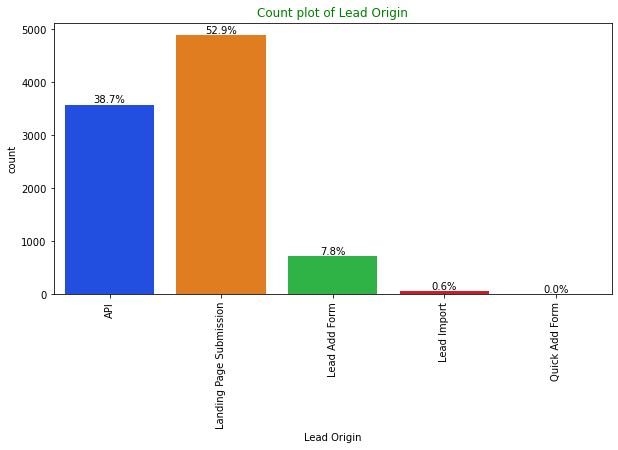

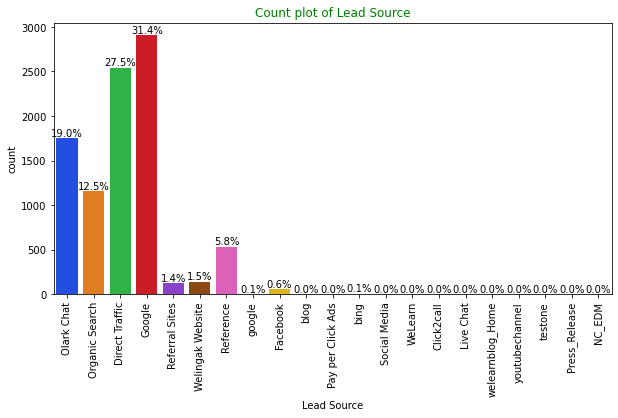

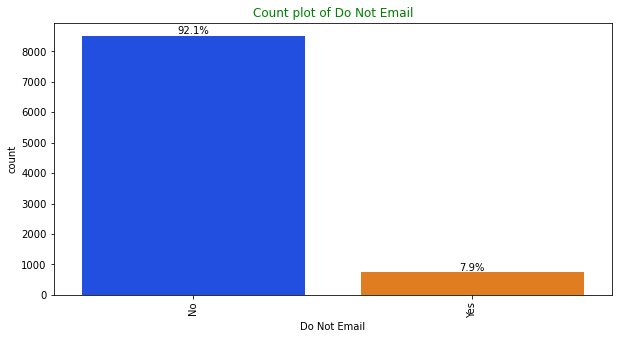

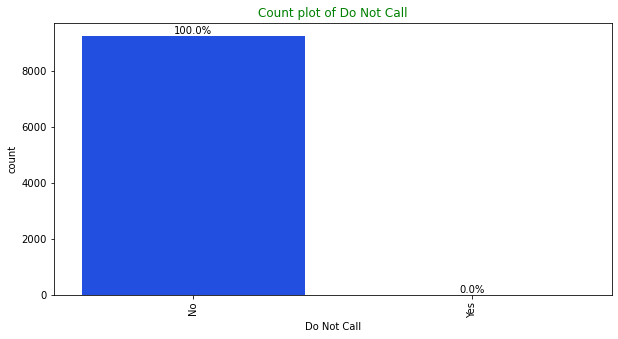

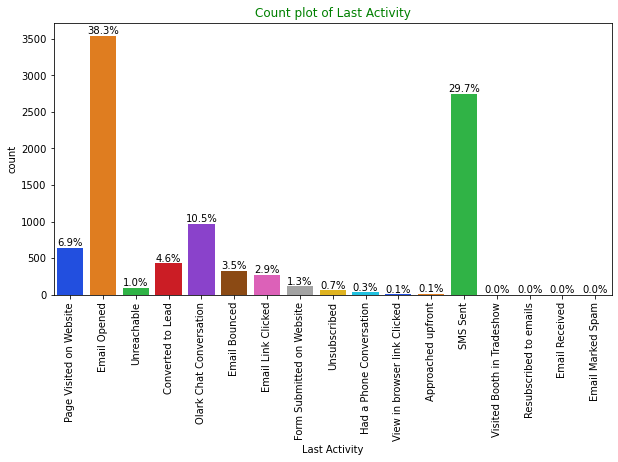

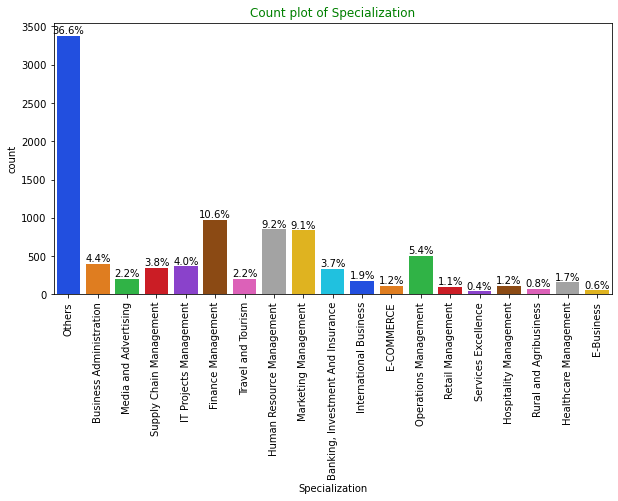

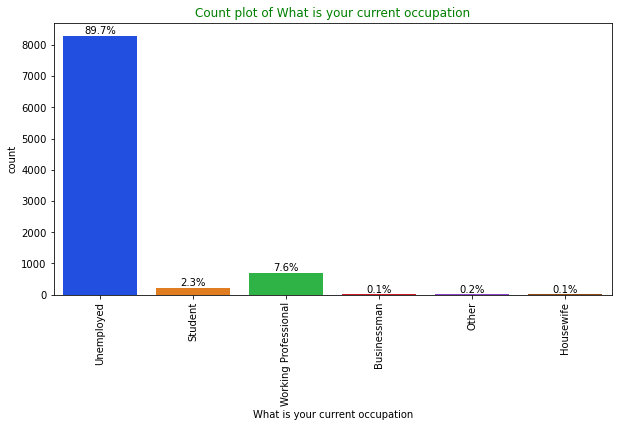

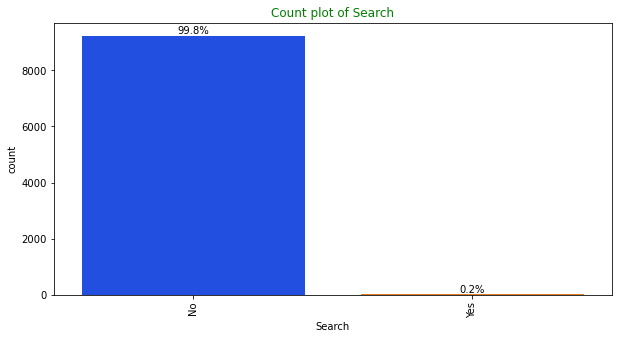

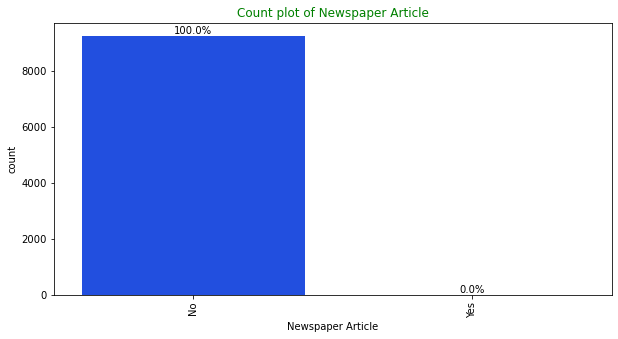

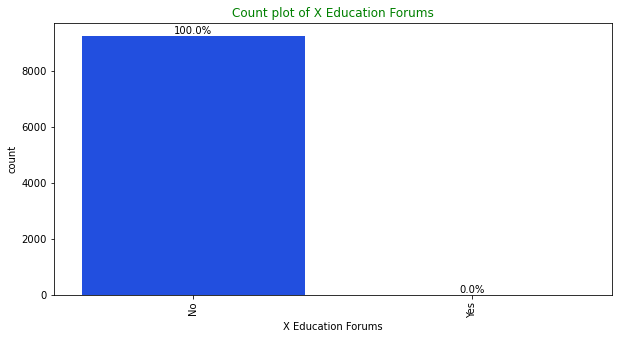

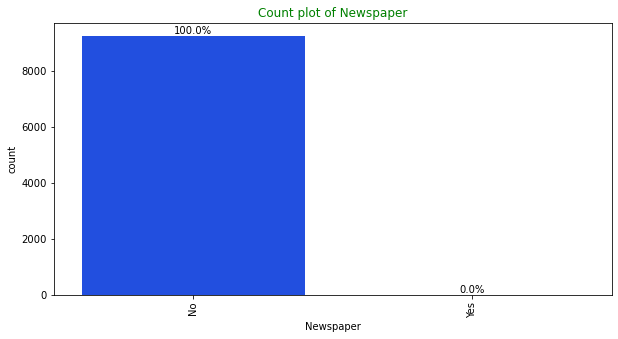

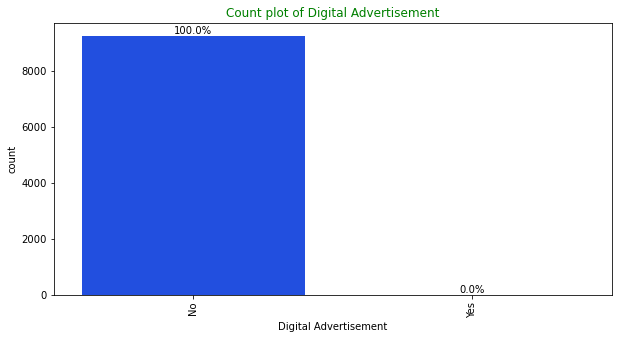

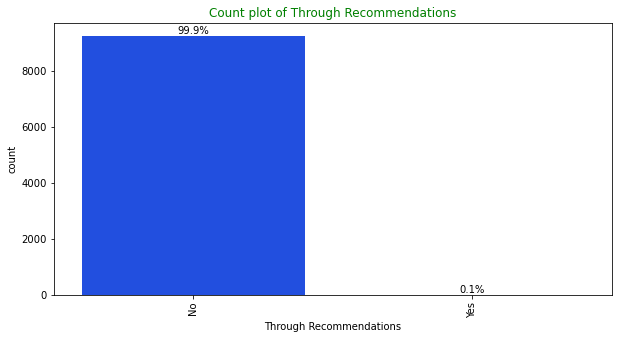

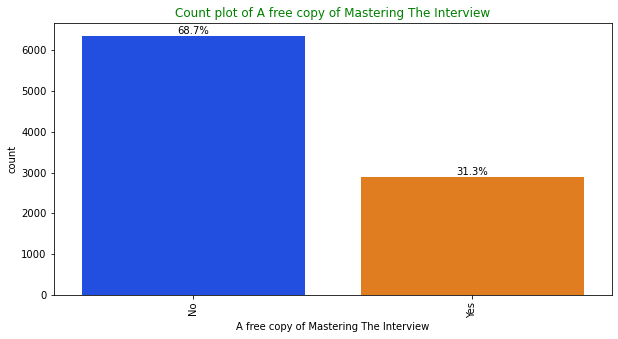

In [24]:
columnsList = leads_dataset.select_dtypes(include=['category', 'object']).columns.tolist()

for i in columnsList[:]:
    plt.figure(figsize = [10,5])
    plt.title("Count plot of {}".format(i),color='green')
    ax = sns.countplot(x=i, data=leads_dataset, palette='bright')
    total = len(leads_dataset[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
plt.show()

#### Inference:
The following columns have highly skewed data, hence these variables will affect the performance of logistic regression models as they will lead to biasness.

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

In [25]:
# Dropping categorical columns with highly skewed data

leads_dataset.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print(leads_dataset.shape)

(9240, 11)


#### 3.6 Outlier Analysis

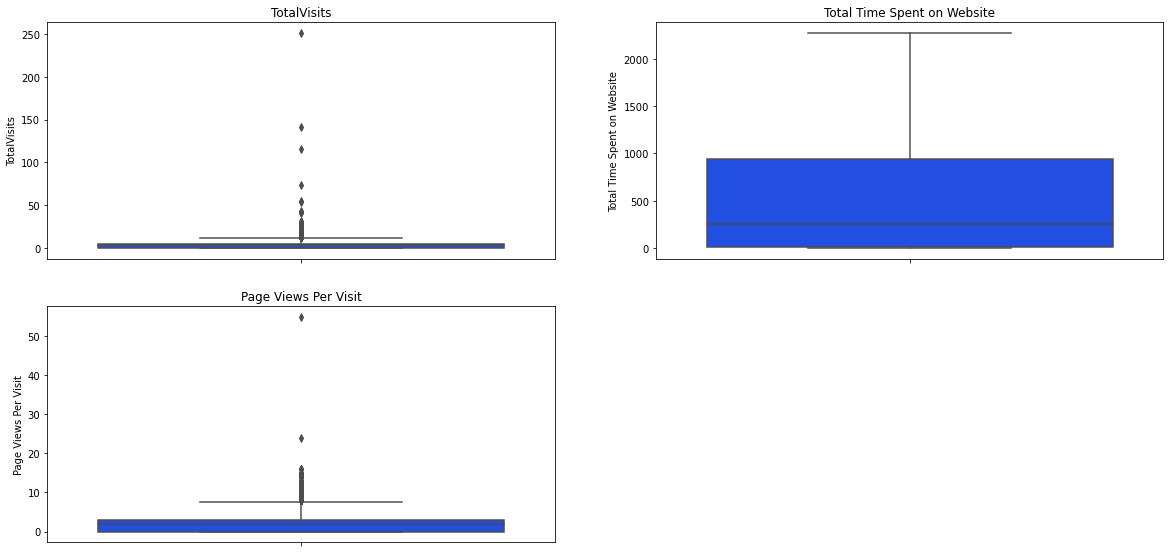

In [26]:
# Checking outliers for numerical variables other than target variable 
columnsList = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (20, 20))
for col in enumerate(columnsList):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(y=col[1], data = leads_dataset, palette='bright')

plt.show()

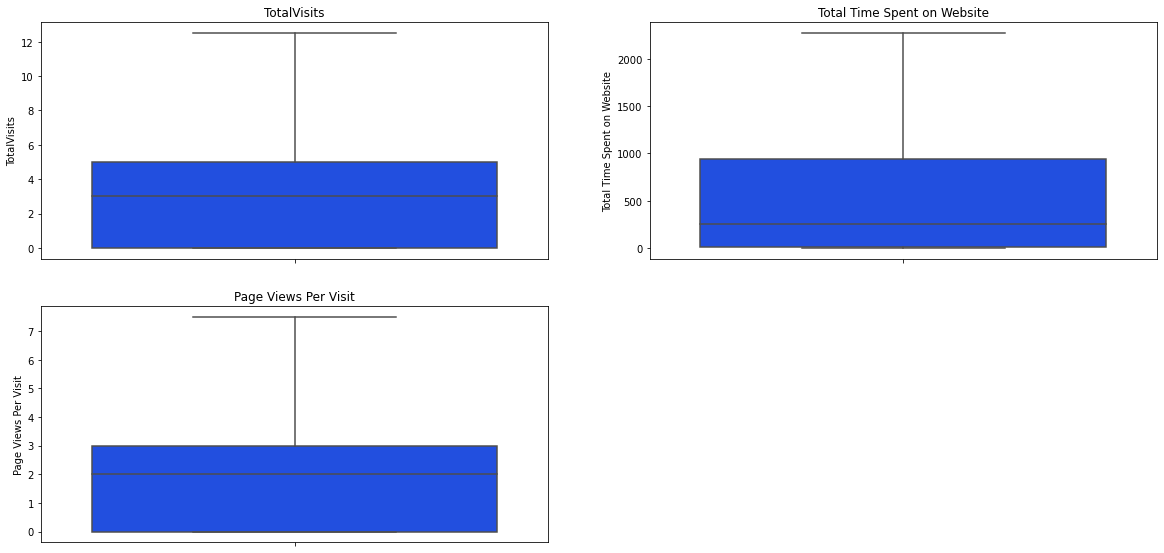

In [27]:
# Defining UDF to treat outliers via capping and flooring
columnsList = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in columnsList:
        q1 = leads_dataset[i].describe()["25%"]
        q3 = leads_dataset[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        
        # Capping upper_bound
        leads_dataset[i] = np.where(leads_dataset[i] > upper_bound, upper_bound,leads_dataset[i])
        # Flooring lower_bound
        leads_dataset[i] = np.where(leads_dataset[i] < lower_bound, lower_bound,leads_dataset[i])

# Checking outliers after treating
plt.figure(figsize = (20, 20))
for col in enumerate(columnsList):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(y=col[1], data = leads_dataset, palette='bright')

plt.show()

#### 3.7 Data Standardization

In [28]:
# Checking for unique categorical variables
columnsList = ["Lead Origin","Lead Source","Last Activity","Specialization"]

for i in columnsList:
        uniqueCat = leads_dataset[i].value_counts(normalize=True)*100
        print("Unique Categories in",i.upper(), ":\n")
        print(uniqueCat, "\n")
        print("==="*40, "\n")

Unique Categories in LEAD ORIGIN :

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Unique Categories in LEAD SOURCE :

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 


Unique Categories 

#### Inference:
- Some categories in the 'Lead Score' and 'Last Activity' columns have very few records. For these variables we can create dummy variables and group them together under "Others" category.

- In 'Lead Source' column, "Google" & "google" are same, so we will standardise the case.

In [29]:
# Grouping low frequency value levels to Others
leads_dataset['Lead Source'] = leads_dataset['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Grouping low frequency value levels to Others 
leads_dataset['Last Activity'] = leads_dataset['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')


# Changing google to Google
leads_dataset['Lead Source'] = leads_dataset['Lead Source'].replace("google","Google")

# After Data Standardization
columnsList = ["Lead Origin","Lead Source","Last Activity","Specialization"]
for i in columnsList:
        uniqueCat = 100*leads_dataset[i].value_counts(normalize=True)
        print("Unique Categories in", i.upper(), ":\n")
        print(uniqueCat, "\n")
        print("==="*40, "\n")

Unique Categories in LEAD ORIGIN :

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Unique Categories in LEAD SOURCE :

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64 


Unique Categories in LAST ACTIVITY :

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last

In [30]:
# Renaming column 'A free copy of Mastering The Interview' to 'Free_Copy'
leads_dataset.rename(columns = {'A free copy of Mastering The Interview': 'Free_Copy'}, inplace=True)

# Renaming column 'What is your current occupationA free copy of Mastering The Interview' to 'Current_Occupation'
leads_dataset.rename(columns = {'What is your current occupation': 'Current_Occupation'}, inplace=True)
leads_dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_Copy
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,No


In [31]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_dataset['Do Not Email'] = leads_dataset['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_dataset['Free_Copy'] = leads_dataset['Free_Copy'].apply(lambda x: 1 if x =='Yes' else 0)
leads_dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_Copy
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


### Step 4: Exploratory Data Analysis 
#### 4.1 Univariate Analysis of Categorical Variables...

In [32]:
# List of categorical variable columns
CatVarCols = ['Lead Origin', 'Current_Occupation', 'Do Not Email',
            'Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']

<Figure size 720x1440 with 0 Axes>

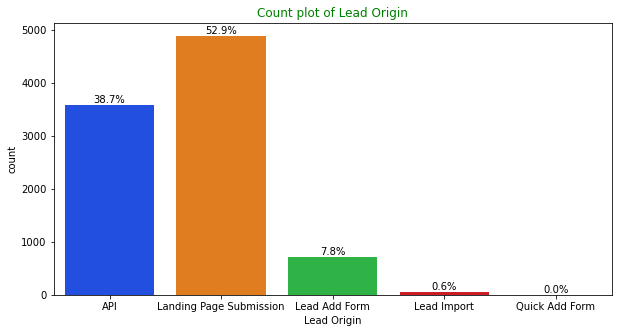

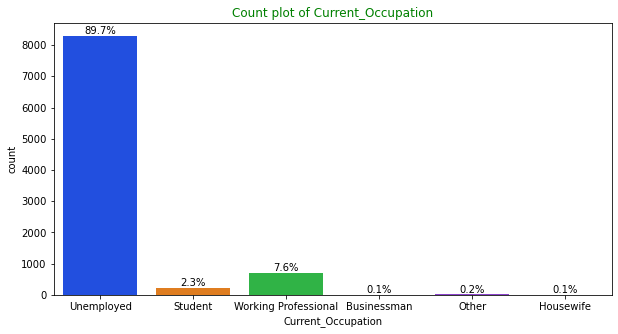

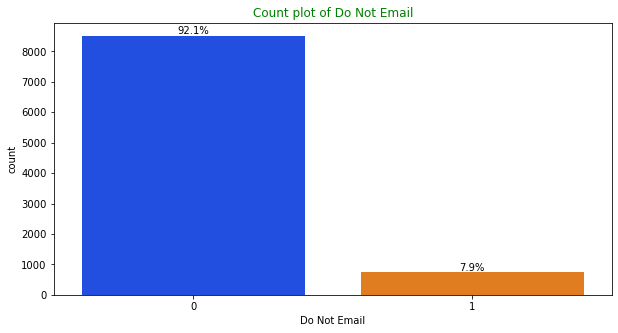

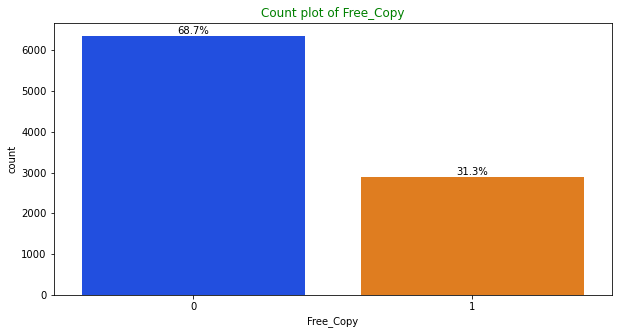

In [33]:
# Countplot of columns with short xticks
plt.figure(figsize = [10,20])
for i in CatVarCols[:4]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i), color='green')
    ax = sns.countplot(x=i, data=leads_dataset, palette='bright')
    total = len(leads_dataset[i])
    plt.xticks(rotation=0)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

<Figure size 720x1440 with 0 Axes>

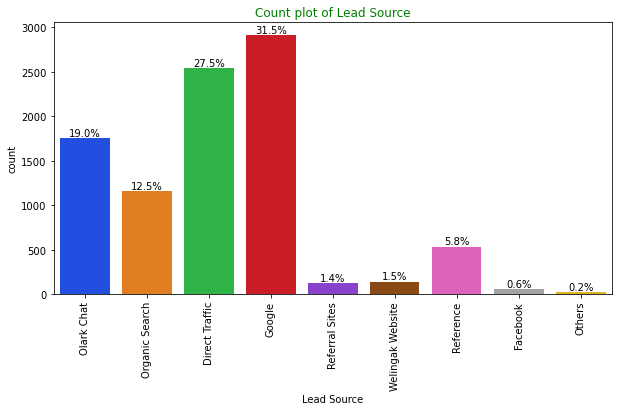

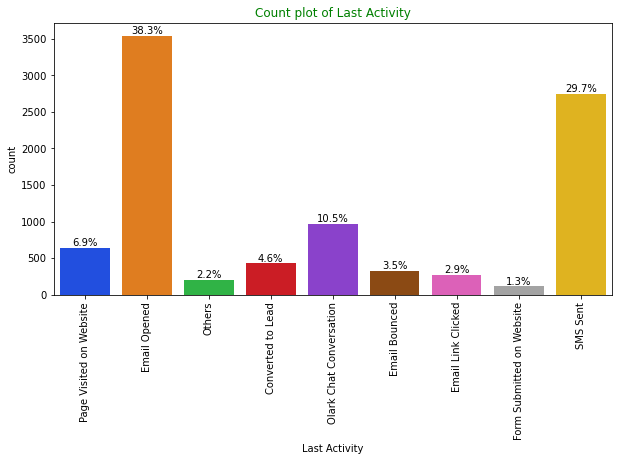

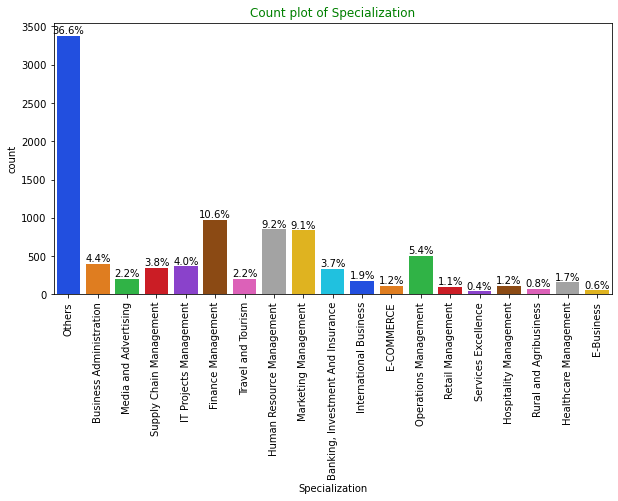

In [34]:
# Countplot of columns with long xticks
plt.figure(figsize = [10,20])
for i in CatVarCols[4:]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i), color='green')
    ax = sns.countplot(x=i, data=leads_dataset, palette='bright')
    total = len(leads_dataset[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

#### Inference drawn from Univariate Analysis for Categorical Variables:
- **Lead Origin:** The majority of customers, 52.9%, were identified through 'Landing Page Submission' as the lead origin, followed by 'API' at 38.7%.
- **Current_occupation:** A significant proportion of customers, 89.7%, are unemployed based on the current occupation information.
- **Do Not Email:** A large proportion of customers, 92.1%, do not want to receive emails about the course.
- **Lead Source:** The primary lead source is Google at 31.5%, followed by Direct Traffic at 27.5%.
- **Last Activity:** Email is the most common last activity, with 38.3% of customers having opened an email, and 29.7% having sent an SMS.
- **Specialization:** The 'Others' specialization category is the most common among customers at 36.6%, followed by Finance Management at 10.6%, HR Management at 9.2%, Marketing Management at 9.1%, and Operations Management at 5.4%.

#### 4.2 Bivariate Analysis of Categorical Variables

In [35]:
# Function to do Bivariate Analysis
def BiVarAnalysis(dataframe , var_name, Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("Lead Conversion Rate of {}".format(var_name),color="red",fontsize=18)
    
    ax=sns.countplot(x=var_name, hue=Target, data=dataframe, palette="mako")
    
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(var_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

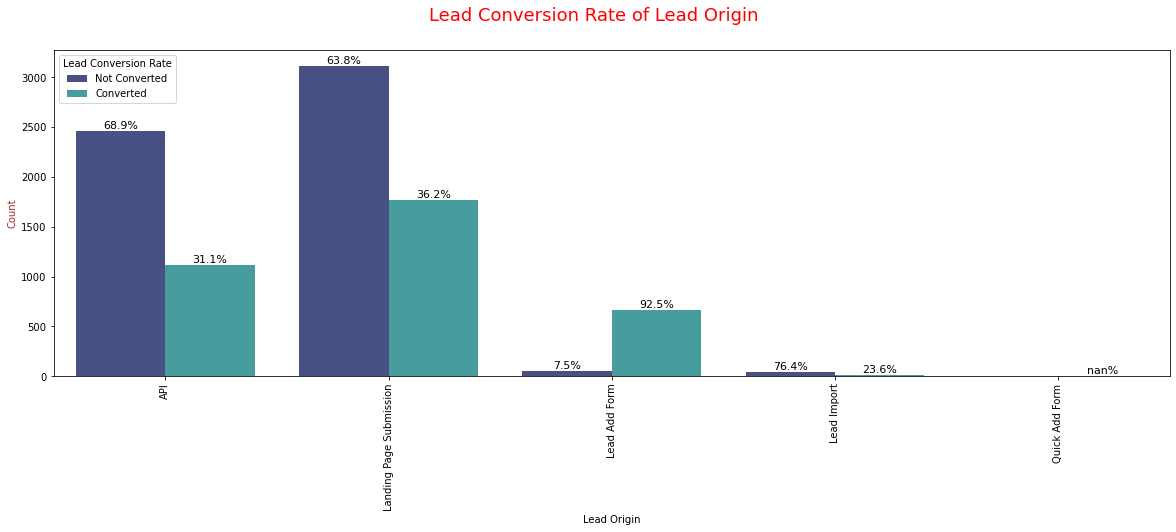

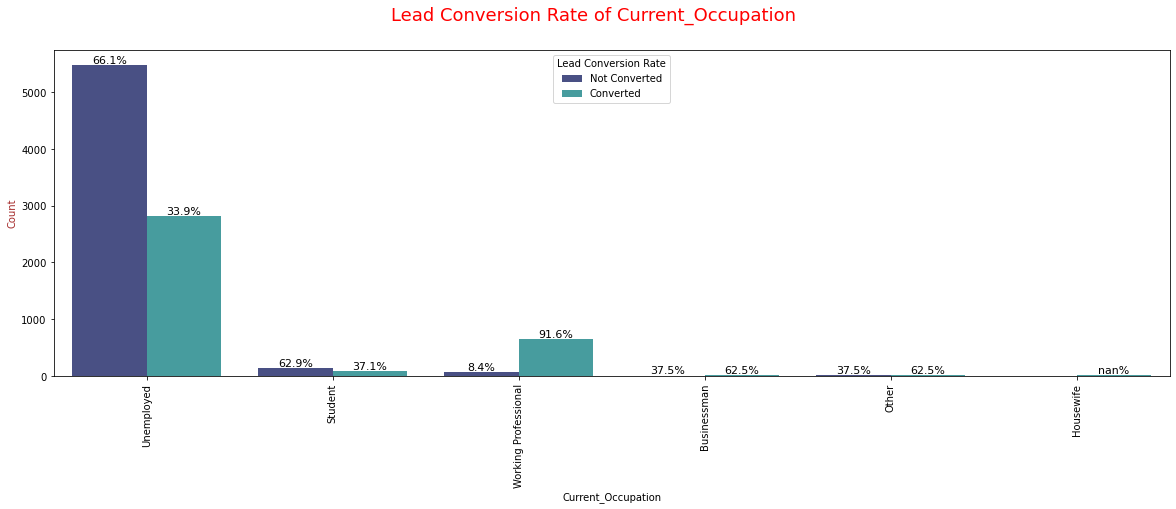

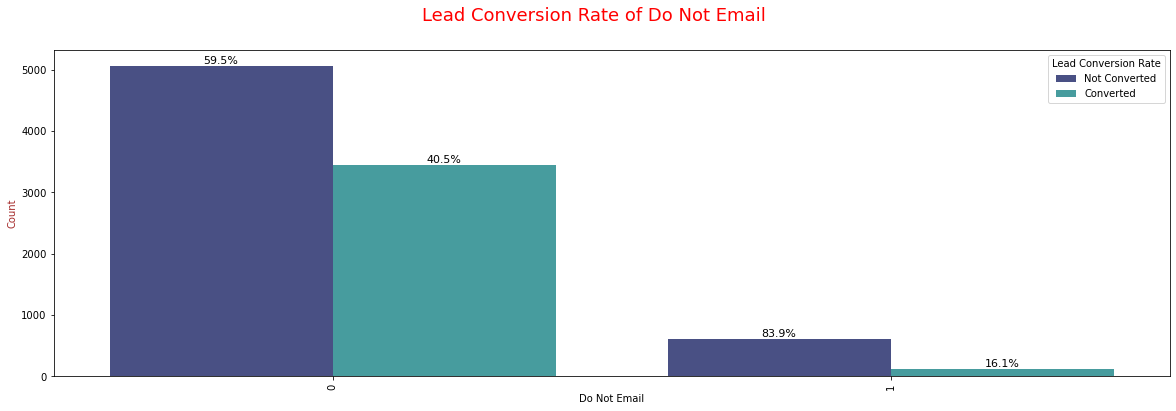

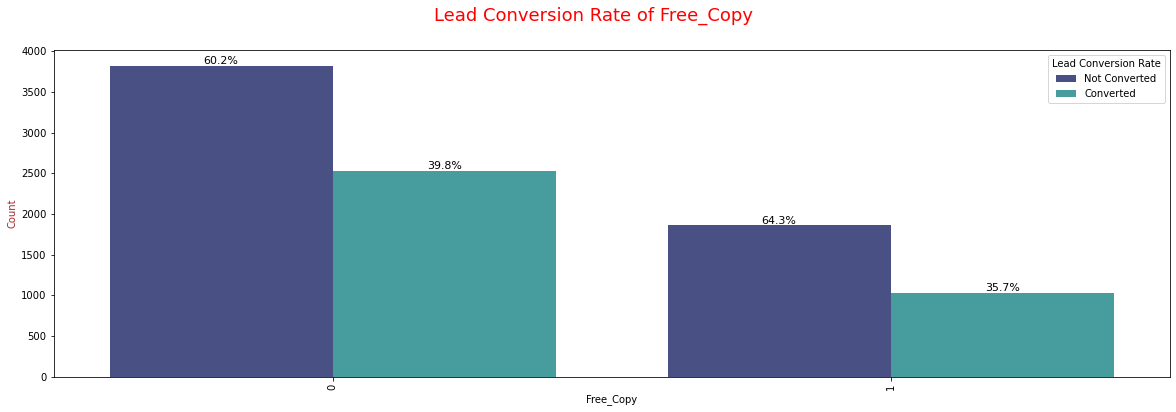

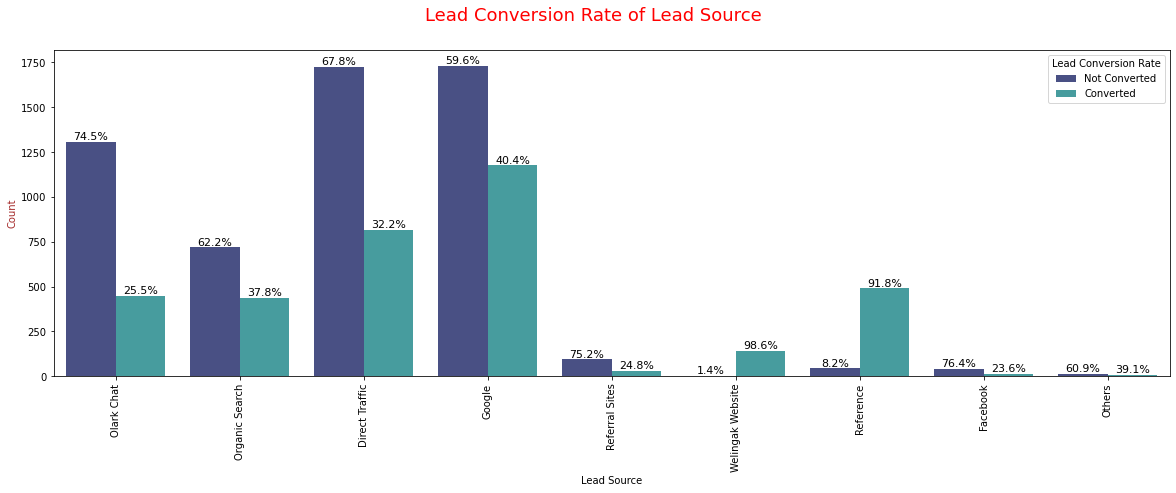

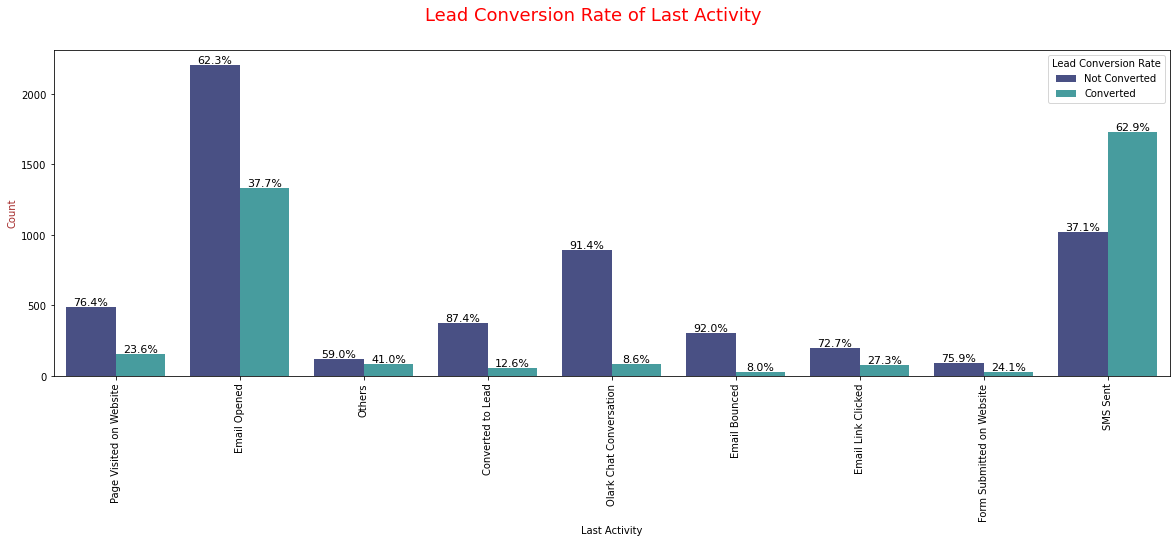

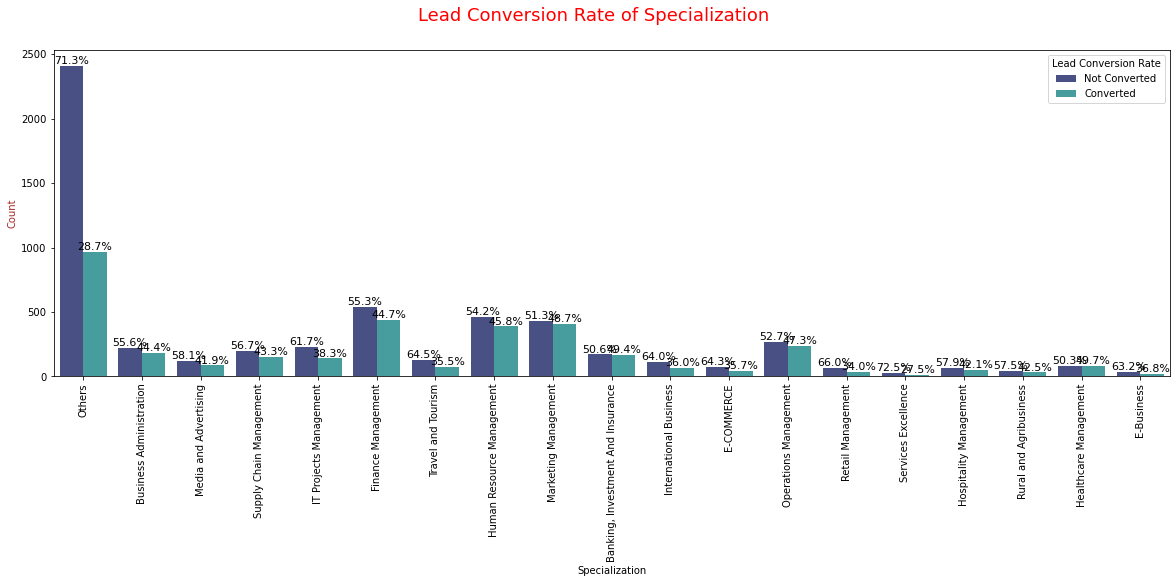

In [36]:
CatVarCols = ['Lead Origin', 'Current_Occupation', 'Do Not Email',
            'Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']
#Calling Bivariate Analysis function
for i in CatVarCols:
    BiVarAnalysis(leads_dataset,var_name=i)

#### Inference drawn from Bivariate Analysis for Categorical Variables:
- **Lead Origin:** 'Landing Page Submission' is the most effective Lead Origin with a Lead Conversion Rate (LCR) of 36.2%, followed by 'API' at 31.1%.
- **Current_Occupation:** Working Professionals have a significantly higher LCR at 91.6% compared to Unemployed people at 33.9%.
- **Lead Source:** Google is the most effective Lead Source with an LCR of 40.4%, followed by Direct Traffic at 32.2% and Organic Search at 37.8% (contributing to only 12.5% of customers). Reference has the highest LCR at 91.8%, but there are only 5.8% of customers through this Lead Source.
- **Last Activity:** SMS Sent and Email Opened are the most effective Last Activity types with LCRs of 62.9% and 37.7% respectively.
- **Specialization:** Marketing Management, HR Management, Finance Management and Operations Management all show good LCRs, indicating a strong interest among customers in these specializations.

#### 4.3 Bivariate Analysis of Numerical Variables

In [37]:
NumVarCols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1152x288 with 0 Axes>

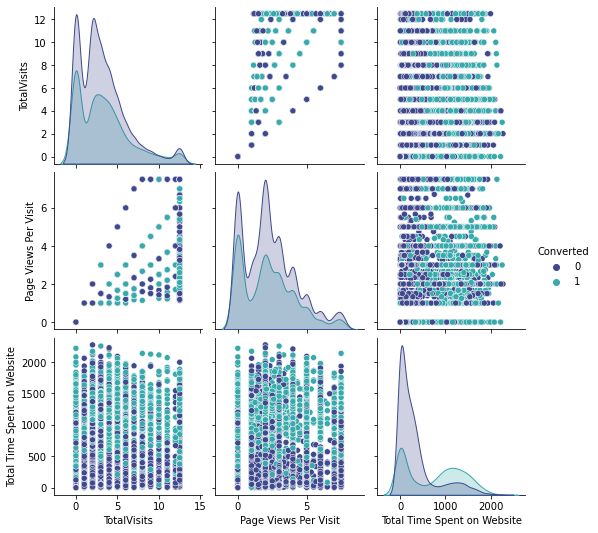

In [38]:
# Pairplot of Numerical Variables
plt.figure(figsize = (16, 4))
sns.pairplot(data=leads_dataset, vars=NumVarCols[1:], hue="Converted", palette="mako")                                  
plt.show()

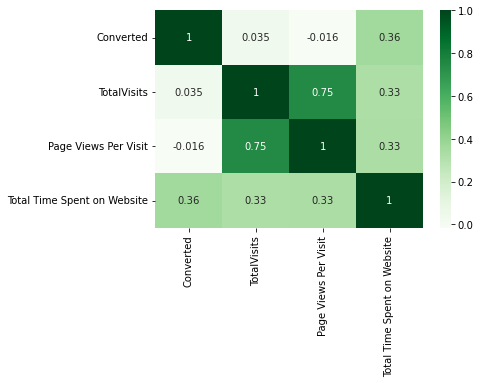

In [39]:
# Heatmap to show correlation between Numerical Variables
sns.heatmap(data=leads_dataset[NumVarCols].corr(), cmap="Greens", annot=True)
plt.show()

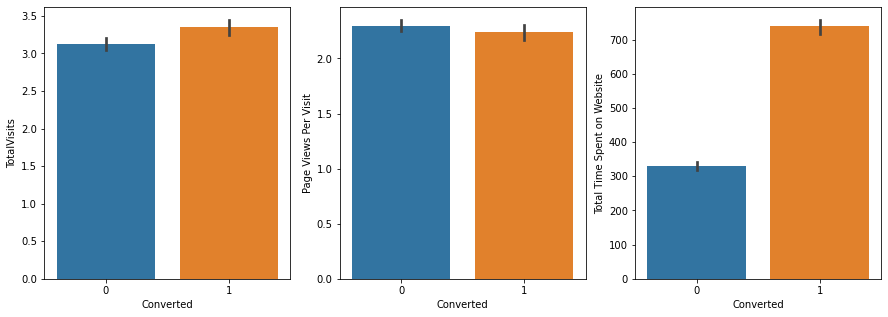

In [40]:
# Barplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = leads_dataset)
plt.subplot(1,3,2)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_dataset)
plt.subplot(1,3,3)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_dataset)
plt.show()

#### Inference drawn from Bivariate Analysis for Numerical Variables:
- There is a strong positive correlation between 'Total Visits' and 'Page Views per Visit', indicating that customers who visit the website more frequently tend to view more pages per visit.
- Customers who spend more time on the website have a higher LCR, indicating that increasing the time spent on the website can lead to higher conversion rates.

### Step 5: Data Preparation
#### 5.1 Create dummy variables for all categorical variables....

In [41]:
leads_dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_Copy
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


In [42]:
# Creating a dummy variable for 5 categorical variables & dropping the 1st one.
dummy = pd.get_dummies(leads_dataset[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                 'Current_Occupation']], drop_first=True)

# Adding the results to the master dataframe
leads_dataset = pd.concat([leads_dataset, dummy], axis=1)
leads_dataset.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# Dropping original columns after creating dummy variables

leads_dataset = leads_dataset.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation'],1)
leads_dataset.shape

(9240, 49)

In [44]:
leads_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   float64
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_Copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

#### 5.2 Splitting the Data into Training and Testing Sets

In [45]:
# Putting predictor variables to X
X = leads_dataset.drop('Converted', axis=1)

# Putting Target variables to y
y = leads_dataset['Converted']

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


### Step 6: Feature Scaling and Correlation Checking
#### 6.1 Feature Scaling using Standard Scaler

In [47]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Fetching int64 and float64 dtype columns from dataframe for scaling
NumVarCols = X_train.select_dtypes(include=['int64','float64']).columns

X_train[NumVarCols] = scaler.fit_transform(X_train[NumVarCols])

# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
# Checking the Lead Conversion Rate (LCR) for 'Converted' Target Variable

LCR = round((sum(leads_dataset['Converted'])/len(leads_dataset['Converted'].index))*100, 2)
print('Lead Conversion Rate(LCR) =', LCR)

Lead Conversion Rate(LCR) = 38.54


#### 6.2 Looking at Correlations

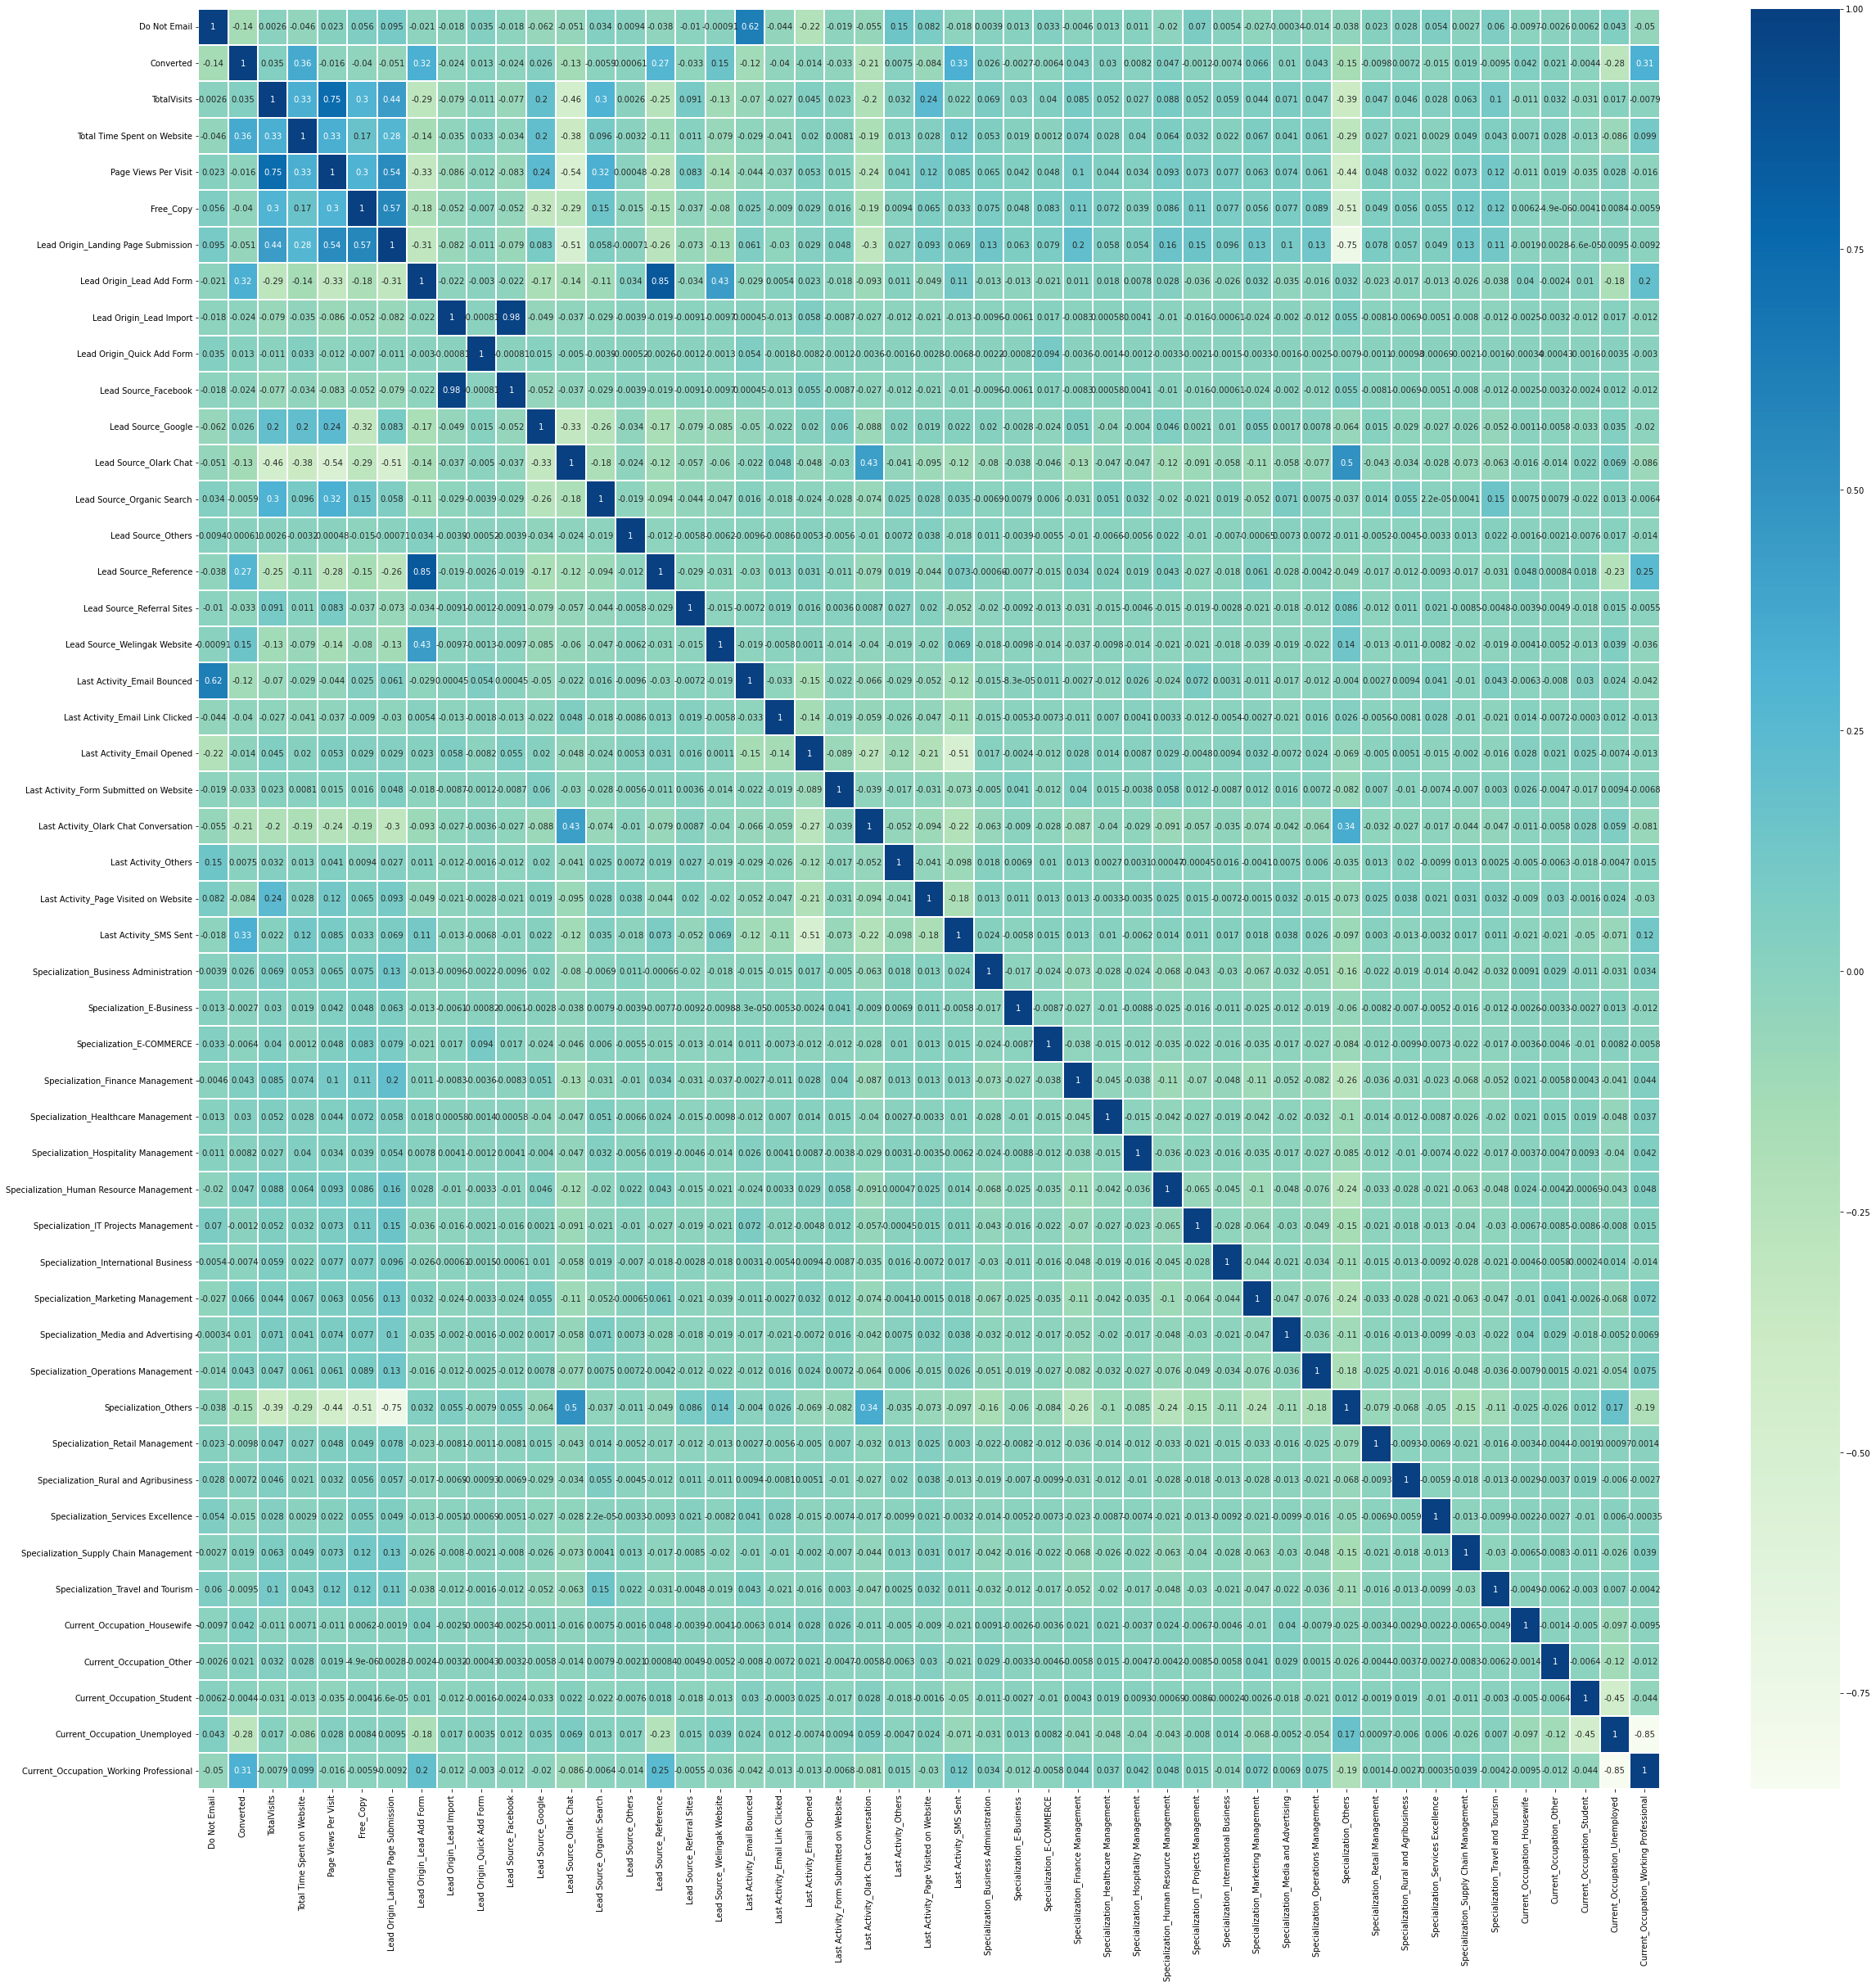

In [49]:
# Analysing correlation matrix
plt.figure(figsize = (40, 40))        
sns.heatmap(leads_dataset.corr(), linewidths=0.01, cmap="GnBu", annot=True)
plt.show()

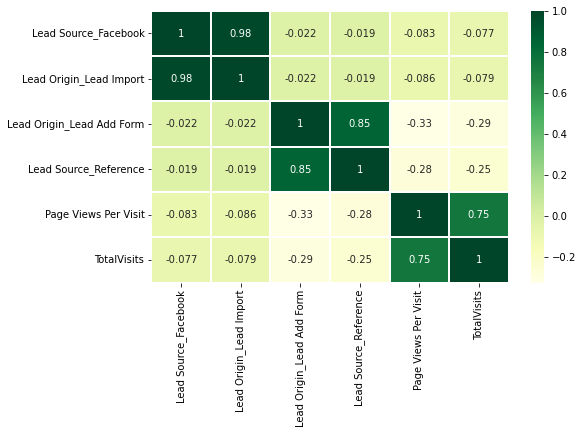

In [50]:
# Breaking down suspected variables which migh have high correlation with each other.....

plt.figure(figsize = (8,5))        
sns.heatmap(leads_dataset[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
                       'Page Views Per Visit', 'TotalVisits']].corr(), linewidths=0.01, cmap="YlGn", annot=True)
plt.show()

#### Inference:
'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' exhibit high correlation with 'Lead Source_Facebook' **(0.98)** and 'Lead Source_Reference' **(0.85)** respectively, indicating that dropping one of them would not significantly impact the overall model performance.


In [51]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Step 7: Model Building
#### 7.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [52]:
logreg = LogisticRegression()

# running RFE with 13 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_))

[('Do Not Email', False),
 ('TotalVisits', False),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', False),
 ('Free_Copy', False),
 ('Lead Origin_Landing Page Submission', True),
 ('Lead Origin_Quick Add Form', False),
 ('Lead Source_Facebook', True),
 ('Lead Source_Google', False),
 ('Lead Source_Olark Chat', True),
 ('Lead Source_Organic Search', False),
 ('Lead Source_Others', True),
 ('Lead Source_Reference', True),
 ('Lead Source_Referral Sites', False),
 ('Lead Source_Welingak Website', True),
 ('Last Activity_Email Bounced', False),
 ('Last Activity_Email Link Clicked', False),
 ('Last Activity_Email Opened', True),
 ('Last Activity_Form Submitted on Website', False),
 ('Last Activity_Olark Chat Conversation', True),
 ('Last Activity_Others', True),
 ('Last Activity_Page Visited on Website', False),
 ('Last Activity_SMS Sent', True),
 ('Specialization_Business Administration', False),
 ('Specialization_E-Business', False),
 ('Specialization_E-COMMERCE', False),


In [53]:
# Check the top 15 features chosen by RFE

RFETable=pd.DataFrame()
RFETable['Variable Name']=X_train.columns
RFETable['Variable Chosen'] = rfe.support_
RFETable['Ranking']=rfe.ranking_
RFETable.sort_values(by='Ranking')

,Variable Name,Variable Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_Occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


### Logistic Regression Model - 1
**Assessing the model with StatsModels, for the detailed statistics......**

In [54]:
# Columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [55]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 16 Apr 2023   Deviance:                       5465.5
Time:                        23:30:20   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_Occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_Occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

#### Inference:
Removing 'Current_Occupation_Housewife' column from the model as it has higher **p-value (0.99)** than accepted threshold of 0.05 for statistical significance.

In [56]:
# Dropping 'Current_Occupation_Housewife' column
rfe_col=rfe_col.drop('Current_Occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 2

In [57]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 16 Apr 2023   Deviance:                       5480.7
Time:                        23:30:32   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_Occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

#### Inference:
Removing 'Lead Source_Facebook' column from the model as it has higher **p-value (0.187)** than accepted threshold of 0.05 for statistical significance.

In [58]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 3

In [59]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 16 Apr 2023   Deviance:                       5482.6
Time:                        23:30:40   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_Occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

#### Inference:
Removing 'Lead Source_Others' column from the model as it has higher **p-value (0.055)** than accepted threshold of 0.05 for statistical significance.

In [60]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 4

In [61]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sun, 16 Apr 2023   Deviance:                       5486.1
Time:                        23:30:50   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_Occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

### Inference:
**The Logistic Regression Model - 4 is stable and all the p-values are within the acceptable threshold (p-values < 0.05), thus making it suitable for further analysis.**

In [62]:
# UDF for calculating VIFs for variables

def VIFCalc(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model - 4
VIFCalc(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_Occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


#### INFERENCE:
- All variables in our logistic regression model have VIF values less than 5, indicating no high multicollinearity issues.
- All variables in our logistic regression model have p-values less than 0.05, suggesting that they are statistically significant predictors of the outcome variable.
- Based on these findings, we have selected **Logistic Regression Model - 4 (LRMod4)** as our final model for making predictions. We will not consider any other models for further analysis, as this model has acceptable values for both VIF and p-values.

### Step 8: Model Evaluation
#### 8.1 Predicting on the Train set

In [63]:
# Getting the predicted values on the train set

y_train_pred = LRMod4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [64]:
# Creating a data frame with the actual Converted score and Probability of conversion

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [65]:
# Mapping the prediction conversion Rate according to the probability cut off.

y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


#### 8.2 Confusion Matrix

In [66]:
# UDF for Confusion Matrix
def Con_Mat_Func(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    
    acc = round((TN+TP) / float(TN+TP+FN+FP), 4)
    sens = round(TP / float(TP+FN), 4)
    spec = round(TN / float(TN+FP), 4)
    fprate = round(FP/ float(TN+FP), 4)
    prec = round(TP / float(TP+FP), 4)
    recal = round(TP / float(TP+FN), 4)
    npval = round(TN / float(TN+ FN), 4)
    
    print('Accuracy                  =', acc)
    print('Sensitivity               =', sens)
    print('Specificity               =', spec)
    print('False Positive Rate       =', fprate)
    print('Precision                 =', prec)
    print('Recall                    =', recal)
    print('Negative Predictive Value =', npval)

In [67]:
# Confusion matrix  (Actual / Predicted)

confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion1)

[[3588  414]
 [ 846 1620]]


In [68]:
# Actual/Predicted      not_converted      converted  
# not_converted             3588              414
# converted                  846             1620

In [69]:
Con_Mat_Func(confusion1)

Accuracy                  = 0.8052
Sensitivity               = 0.6569
Specificity               = 0.8966
False Positive Rate       = 0.1034
Precision                 = 0.7965
Recall                    = 0.6569
Negative Predictive Value = 0.8092


#### 8.3 Plotting the ROC Curve

In [70]:
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

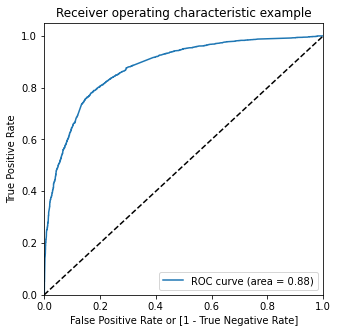

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

#### 8.4 Finding Optimal Cutoff Point

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


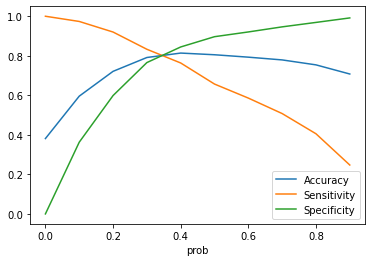

In [74]:
# Let's plot accuracy sensitivity & specificity for various probabilities.....
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.legend(labels=['Accuracy','Sensitivity','Specificity'])

plt.show()

### Inference:
**Based on the curve analysis, a cutoff probability of 0.35(approx) is suggested as the optimal point for classification.**

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


#### 8.5 Calculating all metrics using confusion matrix for Train

In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.final_predicted )
print(confusion2)

[[3245  757]
 [ 500 1966]]


In [77]:
# Actual/Predicted      not_converted      converted  
# not_converted             3064              938
# converted                  412             2054

In [78]:
Con_Mat_Func(confusion2)

Accuracy                  = 0.8057
Sensitivity               = 0.7972
Specificity               = 0.8108
False Positive Rate       = 0.1892
Precision                 = 0.722
Recall                    = 0.7972
Negative Predictive Value = 0.8665


#### 8.6 Precision and Recall

In [79]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
preci, recal, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [80]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.722
Recall score    = 0.7972


In [81]:
# Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

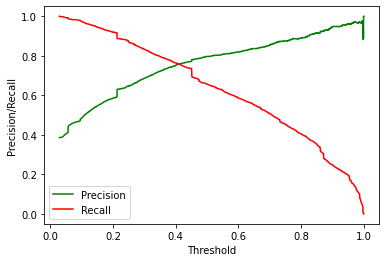

In [82]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

### Inference:
**Based on the precision-recall curve, a threshold of 0.4 provides a good balance between precision and recall.**

### Step 9: Making predictions on the test set

In [83]:
NumVarCols=X_test.select_dtypes(include=['int64','float64']).columns

X_test[NumVarCols] = scaler.transform(X_test[NumVarCols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_Occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


In [84]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

# Making prediction using Logistic Regression Model - 4
y_test_pred = LRMod4.predict(X_test_sm)

# Top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [85]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [86]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [87]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [88]:
# Renaming the column...
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns...
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [89]:
# Taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


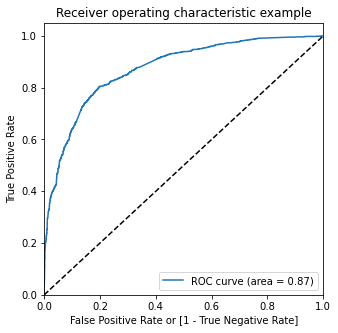

In [90]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [91]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion_test)

[[1359  318]
 [ 227  868]]


In [93]:
#########################################################################
# Actual/Predicted      not_converted      converted  
# not_converted             1359              318
# converted                  227              868
#######################################################################

In [94]:
Con_Mat_Func(confusion_test)

Accuracy                  = 0.8034
Sensitivity               = 0.7927
Specificity               = 0.8104
False Positive Rate       = 0.1896
Precision                 = 0.7319
Recall                    = 0.7927
Negative Predictive Value = 0.8569


#### 9.1 Adding Lead Score to Test dataframe

In [95]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87
5,9186,1,0.503859,1,50
6,1631,1,0.419681,1,42
7,8963,1,0.154531,0,15
8,8007,0,0.072344,0,7
9,5324,1,0.298849,0,30


In [96]:
y_pred_final.sort_values(by='Lead_Score', ascending=False)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1026,5671,1,0.998942,1,100
1239,2489,1,0.996164,1,100
1976,4775,1,0.996645,1,100
196,5793,1,0.996645,1,100
416,2804,1,0.996645,1,100
...,...,...,...,...,...
104,155,0,0.013285,0,1
2712,2577,0,0.014743,0,1
1136,4098,0,0.014996,0,1
597,3682,0,0.013772,0,1


### Inference:
**The customers with a high lead score have a higher chance of conversion and low lead score have a lower chance of conversion.**

## Conclusion drawn from Train-Test dataset
#### Train Data Set:
- Accuracy: 80.57%
- Sensitivity: 79.72%
- Specificity: 81.08%

#### Test Data Set:
- Accuracy: 80.34%
- Sensitivity: 79.27%
- Specificity: 81.04%

**The evaluation metrics of the model are consistently close to each other, indicating that the model is performing consistently across different evaluation metrics in both the test & train datasets. This suggests that the model is reliable & is not overfitting to the training data. It also implies that the model is generalizing well to new data, which is important for real-world applications. The similar performance across evaluation metrics also means that there are no significant biases in the model's predictions. This is a positive sign for the model's performance and provides confidence in its ability to make accurate predictions in the future.**

#### Equation:
ln(odds) = - 1.0236 x const + 1.0498 x Total Time Spent on Website - 1.259 x Lead Origin_Landing Page Submission + 0.9072 x Lead Source_Olark Chat + 2.9253 x Lead Source_Reference + 5.3887 x Lead Source_Welingak Website + 0.9421 x Last Activity_Email Opened -0.5556 x Last Activity_Olark Chat Conversation + 1.2531 x Last Activity_Others + 2.0519 x Last Activity_SMS Sent - 1.0944 x Specialization_Hospitality Management - 1.2033 x Specialization_Others + 2.6697 x Current_Occupation_Working Professional

### Final conclusion:
- 'Lead Origin_Lead Add Form', 'Current_Occupation_Working Professional' and 'Total Time Spent on Website' are effective factors that contribute on good conversion rate.
- Working professionals & Unemployed customers tend to have higher conversion rates.
- Referral leads generated by old customers have a significantly higher conversion rate
- Google and Direct Traffic are channels that are showing promising conversion rates.
- Leads whose 'Last Activity' is ‘SMS Sent’ or ‘Email Opened’ tend to have a higher conversion rate.
- The 'Others' specialization category is the most common among customers followed by Finance Management, HR Management & Marketing Management.

## Recommendations
- The Features such as 'Lead Origin_Lead Add Form', 'Current_Occupation_Working Professional', & 'Total Time Spent on Website' have a high conversion rate & should be utilized more in lead generation efforts.
- "Working professionals" should be aggressively targeted as they have a higher probability of converting & are usually  have good financial situations to pay for services.
- Referral leads generated by old customers have a significantly higher conversion rate & should be incentivized with discounts or other rewards to encourage more referrals.
- Increasing the frequency of media usage such as Google ads or email campaigns can save time & increase the conversion rate.
- Leads whose 'Last Activity' is ‘SMS Sent’ or ‘Email Opened’ are tend to have a higher conversion rate & should be targeted more frequently.
- Analyzing the behavior of customers who spend more time on the website can help improve the user experience & increase conversion rates, company should focus on creating engaging content & user-friendly navigation to encourage customers to spend more time on the website.
- Understanding the most popular specializations can help tailor course offerings & marketing campaigns to specific groups of customers. Providing targeted content & resources for popular specializations such as Marketing Management, HR Management also helps attract customers in those fields.